In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Project6/')
!pwd

/content/drive/MyDrive/Project6


In [ ]:
import string
from numpy import array
from pickle import dump, load
import numpy as np
from numpy import asarray, zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from random import randint
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import os

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	# doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
	return tokens

# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

res = []
dirPath = r'dataset_text_clean'
path = os.getcwd()
dir_path = os.path.join(path , dirPath)
subDir = ''
# list to store files
# Iterate directory
for file_path in os.listdir(dir_path):
	subDir = file_path
	for file in  os.listdir(os.path.join(dir_path, file_path)):
      # check if current file_path is a file
		if os.path.isfile(os.path.join(dir_path, file_path, file)):
         # add filename to list
			res.append(os.path.join(dir_path, file_path, file))
	break

print ( len (res))
print(res)

549
['/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/أولاد أحمد.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/عبدالوهاب البياتي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/عمر أبو ريشة.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/إيليا أبو ماضي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/سعدي يوسف.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/توفيق زياد.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/غادة السمان.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/يحيى السماوي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/علي أحمد باكثير.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/محمد الفيتوري.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/عبدالله الفيصل.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر ال

In [ ]:
# load document
text = ''
for i in range(len (res)):
	text += load_doc(res[i]) +'\n'

# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')
print(text[:200])

Length of text: 29666898 characters
ناقص أنت ومنقوص أنا 
قلق الانسان حتي قلقا قطر الكاس مرارا واستباح العرقا وهم القصر او القصر او القصر او القصر او القصر او القصر او القصراو القصر او القصر حتي خلدوا باصابع فارغه واكف تملءها الحناء يدخل


In [ ]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

174 unique characters


In [ ]:
example_texts = ['ابتثججخدذرز', 'هون']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
print ("chars ={}".format(chars))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>


In [ ]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)

ids = ids_from_chars(chars)
print ("chars ={}".format(chars))
print ("ids ={}".format(ids))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>
ids =<tf.RaggedTensor [[94, 95, 97, 98, 99, 99, 101, 102, 103, 104, 105], [121, 122, 120]]>


In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(),
															 invert=True, mask_token=None)

chars = chars_from_ids(ids)
print ("chars ={}".format(chars))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>


In [ ]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'\xd8\xa7\xd8\xa8\xd8\xaa\xd8\xab\xd8\xac\xd8\xac\xd8\xae\xd8\xaf\xd8\xb0\xd8\xb1\xd8\xb2',
       b'\xd9\x87\xd9\x88\xd9\x86'], dtype=object)

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
print ("all_ids ={}".format(all_ids))

all_ids =[120  94 116 ... 121   2   2]


In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

ن
ا
ق
ص
 
أ
ن
ت
 
و


In [ ]:
seq_length = 100

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'\xd9\x86' b'\xd8\xa7' b'\xd9\x82' b'\xd8\xb5' b' ' b'\xd8\xa3'
 b'\xd9\x86' b'\xd8\xaa' b' ' b'\xd9\x88' b'\xd9\x85' b'\xd9\x86'
 b'\xd9\x82' b'\xd9\x88' b'\xd8\xb5' b' ' b'\xd8\xa3' b'\xd9\x86'
 b'\xd8\xa7' b' ' b'\n' b'\xd9\x82' b'\xd9\x84' b'\xd9\x82' b' '
 b'\xd8\xa7' b'\xd9\x84' b'\xd8\xa7' b'\xd9\x86' b'\xd8\xb3' b'\xd8\xa7'
 b'\xd9\x86' b' ' b'\xd8\xad' b'\xd8\xaa' b'\xd9\x8a' b' ' b'\xd9\x82'
 b'\xd9\x84' b'\xd9\x82' b'\xd8\xa7' b' ' b'\xd9\x82' b'\xd8\xb7'
 b'\xd8\xb1' b' ' b'\xd8\xa7' b'\xd9\x84' b'\xd9\x83' b'\xd8\xa7'
 b'\xd8\xb3' b' ' b'\xd9\x85' b'\xd8\xb1' b'\xd8\xa7' b'\xd8\xb1'
 b'\xd8\xa7' b' ' b'\xd9\x88' b'\xd8\xa7' b'\xd8\xb3' b'\xd8\xaa'
 b'\xd8\xa8' b'\xd8\xa7' b'\xd8\xad' b' ' b'\xd8\xa7' b'\xd9\x84'
 b'\xd8\xb9' b'\xd8\xb1' b'\xd9\x82' b'\xd8\xa7' b' ' b'\xd9\x88'
 b'\xd9\x87' b'\xd9\x85' b' ' b'\xd8\xa7' b'\xd9\x84' b'\xd9\x82'
 b'\xd8\xb5' b'\xd8\xb1' b' ' b'\xd8\xa7' b'\xd9\x88' b' ' b'\xd8\xa7'
 b'\xd9\x84' b'\xd9\x82' b'\xd8\xb5' b'\xd8\xb1' 

In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy().decode('utf-8'))

b'\xd9\x86\xd8\xa7\xd9\x82\xd8\xb5 \xd8\xa3\xd9\x86\xd8\xaa \xd9\x88\xd9\x85\xd9\x86\xd9\x82\xd9\x88\xd8\xb5 \xd8\xa3\xd9\x86\xd8\xa7 \n\xd9\x82\xd9\x84\xd9\x82 \xd8\xa7\xd9\x84\xd8\xa7\xd9\x86\xd8\xb3\xd8\xa7\xd9\x86 \xd8\xad\xd8\xaa\xd9\x8a \xd9\x82\xd9\x84\xd9\x82\xd8\xa7 \xd9\x82\xd8\xb7\xd8\xb1 \xd8\xa7\xd9\x84\xd9\x83\xd8\xa7\xd8\xb3 \xd9\x85\xd8\xb1\xd8\xa7\xd8\xb1\xd8\xa7 \xd9\x88\xd8\xa7\xd8\xb3\xd8\xaa\xd8\xa8\xd8\xa7\xd8\xad \xd8\xa7\xd9\x84\xd8\xb9\xd8\xb1\xd9\x82\xd8\xa7 \xd9\x88\xd9\x87\xd9\x85 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1 \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1 \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1 '
b'\xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1 \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1 \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1 \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1\xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd8\xb1 \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd

In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [ ]:
# split_input_target(list("Tensorflow"))
split_input_target(list("بسم الله "))
dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy().decode('utf-8'))
    print("Target:", text_from_ids(target_example).numpy().decode('utf-8'))


Input : [b'\xd9\x85\xd8\xad\xd8\xa8 \xd8\xb9\xd9\x81\xd8\xa7\xd9\x81\xd9\x87\xd8\xa7 \xd9\x88\xd8\xaa\xd8\xb9\xd8\xb4\xd9\x82\xd8\xaa \xd8\xa7\xd8\xaf\xd8\xa7\xd8\xa8\xd9\x87 \xd9\x81\xd9\x87\xd9\x85\xd8\xa7 \xd8\xb3\xd9\x88\xd8\xa7 \xd9\x83\xd8\xa7\xd9\x84\xd8\xba\xd8\xb5\xd9\x86 \xd9\x82\xd8\xa7\xd9\x85\xd8\xaa\xd9\x87\xd8\xa7 \xd8\xa7\xd8\xb0\xd8\xa7 \xd8\xa7\xd9\x84\xd8\xba\xd8\xb5\xd9\x86 \xd8\xa7\xd9\x86\xd8\xab\xd9\x86\xd9\x8a \xd9\x88\xd8\xac\xd8\xa8\xd9\x8a\xd9\x86\xd9\x87\xd8\xa7 \xd9\x8a\xd8\xad\xd9\x83\xd9\x8a \xd8\xa7\xd9\x84\xd8\xb5\xd8\xa8\xd8\xa7\xd8\xad \xd8\xa7\xd8\xb0\xd8\xa7 \xd8\xa7\xd9\x86\xd8\xac\xd9\x84\xd9\x8a \xd9\x88\xd9\x82\xd8\xb9\xd8\xaa \xd8\xba\xd8\xaf'
 b'\xd8\xa7\xd8\xb1\n\xd9\x81\xd9\x8a \xd8\xa7\xd9\x86\xd8\xaa\xd8\xb8\xd8\xa7\xd8\xb1 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd9\x8a\xd8\xaf\xd8\xa9 \n\xd8\xa7\xd9\x86\xd8\xaa\xd8\xb8\xd8\xa7\xd8\xb1 \xd8\xa7\xd9\x84\xd9\x82\xd8\xb5\xd9\x8a\xd8\xaf\xd9\x87 \xd8\xa7\xd9\x88\xd9\x82\xd8\xaf\xd8\xaa \xd8\xb5\xd8\

In [ ]:
# Create training batches
# Batch size
BATCH_SIZE = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

print (dataset)


<_PrefetchDataset element_spec=(TensorSpec(shape=(1024, 100), dtype=tf.int64, name=None), TensorSpec(shape=(1024, 100), dtype=tf.int64, name=None))>


In [ ]:
# Build The Model
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)


In [ ]:
# for input_example_batch, target_example_batch in dataset.take(1):
#     example_batch_predictions = model(input_example_batch)
#     print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


In [ ]:
# sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
# sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [ ]:
# sampled_indices

In [ ]:
# print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
# print()
# print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

In [ ]:
# example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
# print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
# print("Mean loss:        ", example_batch_mean_loss)

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss)

In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  44800     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  179375    
                                                                 
Total params: 4162479 (15.88 MB)
Trainable params: 4162479 (15.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


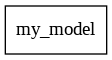

In [ ]:
# representation of model layers
tf.keras.utils.plot_model(model, to_file='images/gru_model.png',
                          show_shapes=True,
                          show_dtype=False,
                          show_layer_names=True,
                          rankdir="TB",
                          expand_nested=False,
                          dpi=96,
                          layer_range=None,
                          show_layer_activations=False,
                          show_trainable=False
                          )

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [ ]:
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])


Epoch 1/20
286/286 [==============================] - 70s 225ms/step - loss: 2.5829
Epoch 2/20
286/286 [==============================] - 66s 225ms/step - loss: 2.2466
Epoch 3/20
286/286 [==============================] - 66s 226ms/step - loss: 2.0977
Epoch 4/20
286/286 [==============================] - 66s 226ms/step - loss: 2.0131
Epoch 5/20
286/286 [==============================] - 66s 226ms/step - loss: 1.9662
Epoch 6/20
286/286 [==============================] - 66s 226ms/step - loss: 1.9372
Epoch 7/20
286/286 [==============================] - 66s 226ms/step - loss: 1.9169
Epoch 8/20
286/286 [==============================] - 66s 226ms/step - loss: 1.9006
Epoch 9/20
286/286 [==============================] - 66s 226ms/step - loss: 1.8872
Epoch 10/20
286/286 [==============================] - 66s 226ms/step - loss: 1.8754
Epoch 11/20
286/286 [==============================] - 66s 226ms/step - loss: 1.8650
Epoch 12/20
286/286 [==============================] - 66s 226ms/step - lo

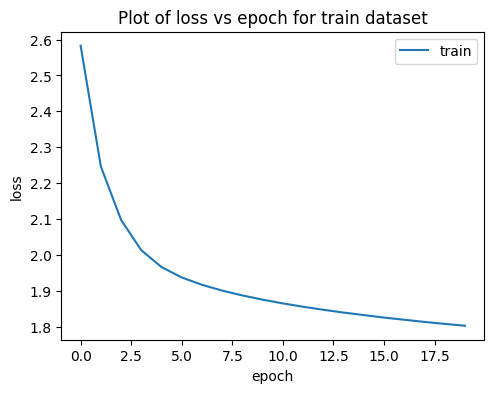

In [ ]:
import matplotlib.pyplot as plt
epochs_range = range(EPOCHS)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title("Plot of loss vs epoch for train dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')

plt.savefig('images/gru_accuracy_loss.png')
plt.show()


In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states


In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [ ]:
import time


start = time.time()
states = None
next_char = tf.constant(['واستباح العرقا'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

In [ ]:
result1 = tf.strings.join(result)
end = time.time()
print(result1[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)


واستباح العرقاء فاتاها الهياء فاستفاقا اذهبي ليلي النبات الحب والشقي بكل وجهك وجدا وادلاجا فتوري سلام تبلغ السطوات اعطانا حظ مهجتي قلبي شديده عواصفا غلب الحزن لذليك تناديني فازتع شدوها بالاماني حروا ماتركبا الصبح امل الجهول الخصور شابه الدعام البرود كذب يشارك ذكرها تغمض العصور الجوانح سامي ويسر تبعث البشيرا لظي النهي توالي ابدا مرمي الجراح المغير شراع فالي المعالي سافر حديث عروش انتست الارض منبر بهامت او جديد يلقي اهاب فاحي قلبي يصيحه والوزن اسلوب القوافي خير مشيب ولم تنظر الوصي الحزن والسهولا نضارا جليلا شواءب استبيح وخصبا واليوم نبع الوجد يوما وندعي العين اصداء مبكرا دينا ارض علي لسان اعر علي الحياه وكدر ان يناموا النزالا انا ونءذي الوجود ينوي وانقض المي لعاب نشرب امس يطرب مصر اهل البر فالمجد نصراني القطار شئت ولي فغي دمع الانام يصيبونا ويءرءن علي الوجود الحطاما ري الوري ومليكم ام جفا وامالا وادي الوضاح فاوشهن كاس المذاب سليمان الحياه طفلتيه المسافه والمازد النونات وازغرد بحر الماضي اشعر اني لبعض قوم علي القوم انيه وقواما رفاقا ضاقت الدهر اشهدتمونا عنا وهنا خوف وانغاما لروحهم وبعد طي

In [ ]:
result_1=  result1[0].numpy().decode('utf-8')

In [ ]:
result_1

'واستباح العرقاء فاتاها الهياء فاستفاقا اذهبي ليلي النبات الحب والشقي بكل وجهك وجدا وادلاجا فتوري سلام تبلغ السطوات اعطانا حظ مهجتي قلبي شديده عواصفا غلب الحزن لذليك تناديني فازتع شدوها بالاماني حروا ماتركبا الصبح امل الجهول الخصور شابه الدعام البرود كذب يشارك ذكرها تغمض العصور الجوانح سامي ويسر تبعث البشيرا لظي النهي توالي ابدا مرمي الجراح المغير شراع فالي المعالي سافر حديث عروش انتست الارض منبر بهامت او جديد يلقي اهاب فاحي قلبي يصيحه والوزن اسلوب القوافي خير مشيب ولم تنظر الوصي الحزن والسهولا نضارا جليلا شواءب استبيح وخصبا واليوم نبع الوجد يوما وندعي العين اصداء مبكرا دينا ارض علي لسان اعر علي الحياه وكدر ان يناموا النزالا انا ونءذي الوجود ينوي وانقض المي لعاب نشرب امس يطرب مصر اهل البر فالمجد نصراني القطار شئت ولي فغي دمع الانام يصيبونا ويءرءن علي الوجود الحطاما ري الوري ومليكم ام جفا وامالا وادي الوضاح فاوشهن كاس المذاب سليمان الحياه طفلتيه المسافه والمازد النونات وازغرد بحر الماضي اشعر اني لبعض قوم علي القوم انيه وقواما رفاقا ضاقت الدهر اشهدتمونا عنا وهنا خوف وانغاما لروحهم وبعد ط

# Export the generator

In [ ]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')


In [ ]:
states = None
next_char = tf.constant(['واستباح'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))
result_2=  tf.strings.join(result)[0].numpy().decode("utf-8")

واستباحوا فاضجروا السيول وفقت ولتحصيف ولم تصلح ارسلتها لتراب لماءعه بيض الاساتين لعمري لقد شتي ويجعلها الي 


In [ ]:
result_2

'واستباحوا فاضجروا السيول وفقت ولتحصيف ولم تصلح ارسلتها لتراب لماءعه بيض الاساتين لعمري لقد شتي ويجعلها الي '